(S:codage-canal:bloc)=
# Codes en bloc

## Principe

Le codage en bloc consiste à associer, à chaque bloc de $k$ bits du message, un bloc de $n$ bits (avec $n>k$).
On définit le **rendement du code** comme étant $k/n$.

Pour nommer un code en bloc, on utilise la notation $C(n,k)$.

```{div} example

Dans ce chapitre, nous utiliserons comme exemple le code à répétition $C(3,1)$.
Ce code est très simple puisqu'il consiste à répéter $n=3$ fois chaque bloc de $k=1$ bits du message.
Il a donc un rendement de $1/3$, ce qui signifie que dans le message codé, seul un tiers n'est pas redondant.

Les blocs possibles et leur code respectif est donc listés dans le tableau ci-dessous :

| $m$ | $c$ |
| --- | --- |
|  0  | 000 |
|  1  | 111 |

Pas de quoi casser des briques, mais cet exemple très simple illustrera les concepts des codes en bloc.
```



## Codage

Plutôt que d'établir une table pour définir les correspondances entre les blocs du message et les mots du code,
on utilise la **matrice génératrice** (_generator matrix_) $G\in\mathbb{F}_2^{k \times n}$.
Chaque mot $c$ du code est calculé à partir d'un bloc $m$ du message par l'équation :

```{margin}
Attention, la multiplication matricielle est également à effectuer dans $\mathbb{F}_2$ !
Donc, $1+1=0$ !
```

$$
c = mG.
$$

```{div} example

La matrice génératrice du code à répétition $C(3,1)$ est

$$
G = \begin{pmatrix}1 & 1 & 1\end{pmatrix}.
$$

En effet :
* le code $c$ associé au message $m=\begin{pmatrix}0\end{pmatrix}$ est

  $$c = mG = \begin{pmatrix}0\end{pmatrix} \begin{pmatrix}1 & 1 & 1\end{pmatrix} = \begin{pmatrix}0 & 0 & 0\end{pmatrix}$$
  
* le code $c$ associé au message $m=\begin{pmatrix}1\end{pmatrix}$ est

  $$c = mG = \begin{pmatrix}1\end{pmatrix} \begin{pmatrix}1 & 1 & 1\end{pmatrix} = \begin{pmatrix}1 & 1 & 1\end{pmatrix}$$
  
```

Si les mots du code contiennent le message qui les a généré, alors le code est dit **systématique**
et la matrice génératrice peut s'écrire sous la forme :

$$
G = \begin{pmatrix} I_k & P \end{pmatrix}
  = \left(
    \begin{array}{ccc|c}
      1 &        & 0 &   \\
        & \ddots &   & P \\
      0 &        & 1 &   \\
    \end{array}
    \right)
$$

où $P\in\mathbb{F}_2^{k \times n-k}$ est une matrice qui définit les bits à ajouter au message.

```{div} example

Le code à répétition $C(3,1)$ est systématique et puisque $G = \begin{pmatrix}I_1 & P\end{pmatrix}$
où $P = \begin{pmatrix}1 & 1\end{pmatrix}$.
```

<a class="exercise btn btn-light" href="td.html#exercice-1" role="button">1</a>

## Détection d'erreur

Le code reçu par le récepteur est noté $r$.
Il peut être différent du code émis $c$ à cause des erreurs de transmission.
On peut modéliser le code reçu $r$ par :

$$
r = c + e
$$

où $e$ est un vecteur binaire dont les <code>1</code> indiquent la présence d'une erreur.
Par exemple, si on émet $c = $<code>0101</code> et qu'on reçoit $r = $<code>0110</code>, on a bien $e = $<code>0011</code>.
Ce modèle correspond à ce qu'on appelle un **canal binaire symétrique** (_binary symmetric channel_).

Le décodage du code reçu $r$ s'effectue en le multipliant par la transposée d'une matrice $H\in\mathbb{F}_2^{n-k \times n}$
appelée **matrice de contrôle de parité** (_parity-check matrix_) :

$$
s = rH^T.
$$

Le résultat $s$ de cette opération est appelé le **syndrome** (_syndrome_).

La matrice de contrôle de parité est construite de sorte à ce que le syndrome soit nul uniquement si $r$ est un mot du code.
De manière équivalente, un syndrome non nul indique la présence d'une erreur de transmission.
Cependant, un syndrome nul n'implique pas que la transmission se soit faite sans erreur !
Par exemple, le code reçu peut être différent du code envoyé, tout en étant un autre mot du code !
Mais ça, on ne peut pas le détecter simplement...

Dans le cas d'un code systématique, la matrice de contrôle de parité s'écrit

$$
H = \begin{pmatrix} P^T & I_{n-k} \end{pmatrix}.
$$

Cette définition de $H$ permet, comme dit précédemment, d'obtenir un syndrome nul s'il n'y a pas d'erreur de transmission.

```{dropdown} Démonstration
D'après les définitions du syndrome $s$, du code reçu $r$, et du code émis $c$ :

$$
\begin{align*}
  s &= rH^T \\
    &= (c+e)H^T \\
    &= cH^T + eH^T \\
    &= mGH^T + eH^T.
\end{align*}
$$

Or, du fait des règles de l'addition dans le corps de Galois,
et par définition des matrices $G$ et $H$ :

$$
\begin{align*}
  GH^T &= \begin{pmatrix} I_k & P \end{pmatrix} \begin{pmatrix} P^T & I_{n-k} \end{pmatrix}^T \\
       &= \begin{pmatrix} I_k & P \end{pmatrix} \begin{pmatrix} P \\ I_{n-k} \end{pmatrix} \\
       &= P + P \\
       &= 0
\end{align*}
$$

Ainsi, $mGH^T = 0$ et donc $s = eH^T$.
Cela implique que s'il n'y a pas d'erreur de transmission ($e=0$) alors le syndrome est nul.
```

```{div} example

Le code à répétition $C(3,1)$ a pour matrice de contrôle de parité

$$
H = \left(
    \begin{array}{c|cc}
      1 & 1 & 0 \\
      1 & 0 & 1 \\
    \end{array}
    \right)
$$

Si on reçoit $r=$<code>011</code>, il y a manifestation une erreur puisque ce mot n'est pas un triplet du même bit :
ce n'est pas un mot du code.
Le syndrome est effectivement non nul :

$$
s = rH^T
  = \begin{pmatrix} 0 & 1 & 1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & 0 \\ 0 & 1 \end{pmatrix}
  = \begin{pmatrix} 1 & 1 \end{pmatrix}
  \neq 0
$$

L'erreur de transmission est donc détectée !
```

<a class="exercise btn btn-light" href="td.html#exercice-1" role="button">1</a>

## Correction d'erreur

Comment corriger le code reçu si une erreur de transmission a été détectée (syndrome non nul) ?
Sans autre information a priori, il est logique de décider que le mot émis soit le mot le plus proche du mot reçu :
on fait dans ce cas l'hypothèse qu'il y a le moins d'erreurs possibles.

On peut interpréter géométriquement les mots d'un code.
En effet, chaque mot du code est un point dans un espace à $n$ dimensions.
Ces points sont plus ou moins éloignés les uns des autres.

Dans le cas où $n \leq 3$, ces points peuvent être représentés.
La figure suivante représente (avec des points bleus) les deux mots du code à répétition $C(3,1)$,
à savoir <code>000</code> et <code>111</code>.
Les trois bits de ces mots représentent les coordonnées des points dans l'espace $\mathbb{F}_2^3$.
Tous les autres mots de trois bits sont également des points spécifiques, mais ils n'appartiennent pas au code.

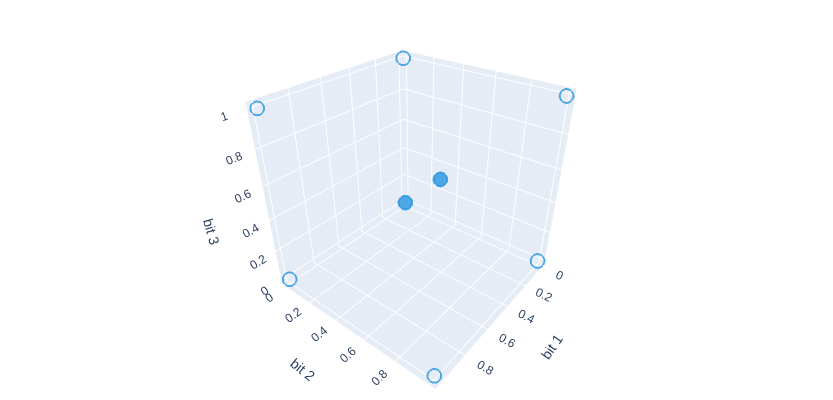

In [1]:
import plotly.graph_objs as go
from myst_nb import glue

x = [0, 0, 0, 0, 1, 1, 1, 1]
y = [0, 0, 1, 1, 0, 0, 1, 1]
z = [0, 1, 0, 1, 0, 1, 0, 1]

type =  [True, False, False, False, False, False, False, True]

clr = "rgba(31,119,180,.8)"
color = []
for t in type:
    color.append(clr if t else "rgba(0,0,0,0)")

trace = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=color,
        line=dict(width=2, color=clr)
    ),
    hovertemplate="%{x}%{y}%{z}"
)

data = [trace]
layout = go.Layout(
    height=400,
    margin=dict(l=10, r=10, b=10, t=0),
    scene_camera=dict(
        eye=dict(x=1.5, y=1.2, z=1.2)
    ),
    scene = dict(
        xaxis_title='bit 1',
        yaxis_title='bit 2',
        zaxis_title='bit 3'
    )
)


fig = go.Figure(data=data, layout=layout)

fig.show()

La **distance de Hamming** (_Hamming distance_) $d(u,v)$ entre deux mots de même longueur $u$ et $v$
est le nombre de symboles différents entre $u$ et $v$.
Géométriquement, la distance de Hamming correspond au nombre de segments qui relient les deux mots.

La **distance minimale** $d_\text{min}$ d'un code est la plus petite distance qu'il existe entre deux mots du code.
Dans le cas des codes linéaires, on peut montrer que $d_\text{min}$ est égale au nombre minimal de symboles non nuls
dans tous les mots du code, à l'exception du mot nul {ref}`[Proakis 2008, p.414]<P:references>`.

Le **pouvoir de détection** d'un code est le nombre maximal d'erreurs qui peut affecter le mot transmis
sans que l'on confonde le mot reçu avec un autre mot du code.
On montre que le pouvoir de détection est égal à $d_\text{min}-1$.

```{margin}
La notation $\lfloor\cdot\rfloor$ désigne la partie entière.
```

Le **pouvoir de correction** d'un code est le nombre maximal d'erreurs qui peut affecter le mot transmis
et qui peuvent être corrigées pour retrouver le mot effectivement émis.
On montre que le pouvoir de correction est égal à $\lfloor(d_\text{min}-1)/2\rfloor$.


```{div} example
Le code à répétition $C(3,1)$ est capable de détecter jusqu'à deux erreurs,
puisque si la transmission introduit une ou deux erreurs, alors le mot reçu n'est pas une triple répétition du bit émis.
Cela correspond bien à $d_\text{min}-1$.

Par ailleurs, le code à répétition $C(3,1)$ est capable de corriger jusqu'à une erreur.
En effet :
* si une seule erreur de transmission est intervenue, alors les deux bits non erronés permettront de prendre la bonne décision quant au bit émis
  (par exemple, si on reçoit <code>100</code> alors on suppose que c'est <code>0</code> qui a été émis) ;
* si deux erreurs de transmission sont intervenues, alors la décision prise sera mauvaise
  (par exemple, si on reçoit <code>101</code> alors que <code>0</code> a été émis,
  le récepteur supposera tout de même que c'est <code>1</code> qui a été émis).
  
Cela correspond bien à $\lfloor(d_\text{min}-1)/2\rfloor$.
```

<a class="exercise btn btn-light" href="td.html#exercice-1" role="button">1</a>
<a class="exercise btn btn-light" href="td.html#exercice-2" role="button">2</a>
<a class="exercise btn btn-light" href="td.html#exercice-3" role="button">3</a>
<a class="exercise btn btn-light" href="td.html#exercice-4" role="button">4</a>